✅ Dataset Loaded Successfully
Shape: (5000, 19)
   Vehicle_ID            Timestamp   Speed_kmh  Acceleration_ms2  \
0        1102  2024-01-01 00:00:00  111.507366         -2.773816   
1        1435  2024-01-01 00:01:00   48.612323         -0.796982   
2        1860  2024-01-01 00:02:00  108.733320          0.253800   
3        1270  2024-01-01 00:03:00   38.579484         -2.111395   
4        1106  2024-01-01 00:04:00   57.172438          1.477883   

   Battery_State_%  Battery_Voltage_V  Battery_Temperature_C  Driving_Mode  \
0        30.415148         378.091525              25.314786             2   
1        97.385534         392.718377              18.240755             1   
2        84.912600         398.993495              44.449145             1   
3        28.777904         358.128273              28.980155             1   
4        29.740160         310.888162              33.184551             2   

   Road_Type  Traffic_Condition   Slope_%  Weather_Condition  Temperature_

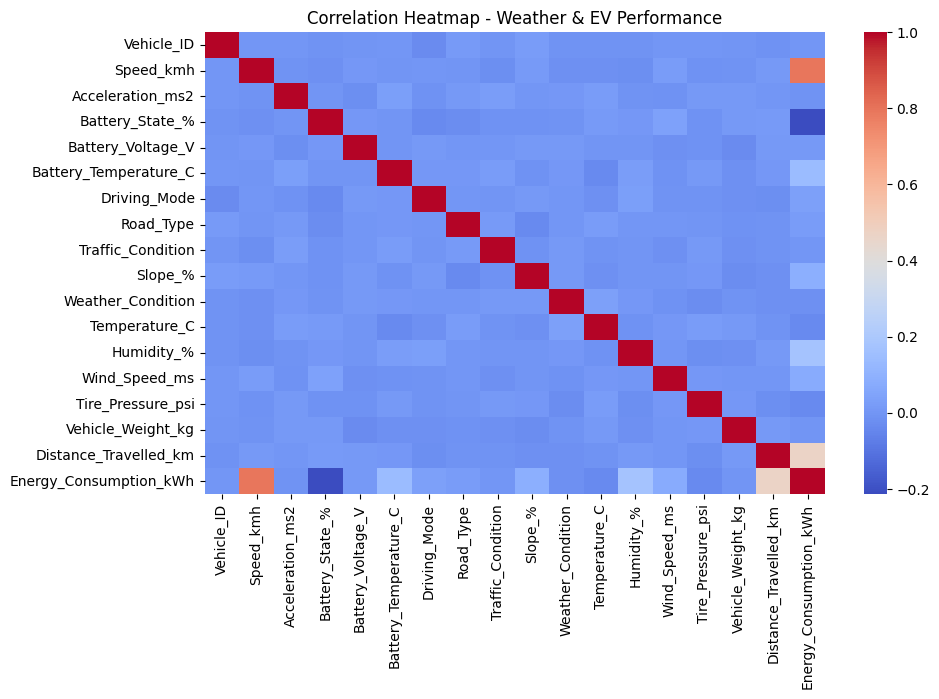


--- Regression Results ---
R² Score: -0.046947563995031416
MAE: 12.861294511798555
RMSE: 14.859048919261753


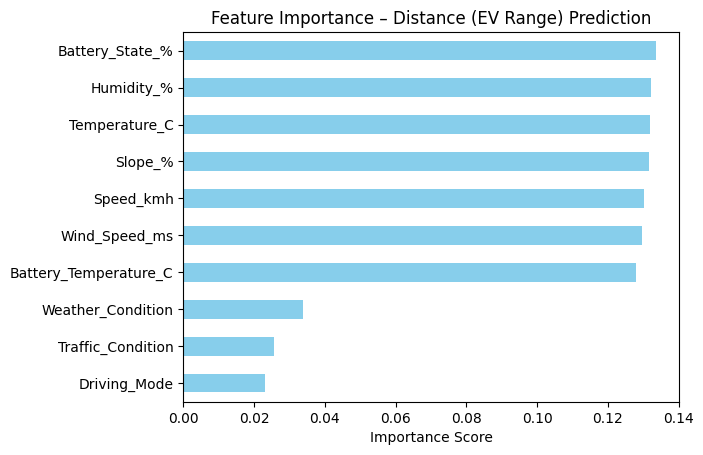


--- Classification Results ---
Accuracy: 0.466

Classification Report:
               precision    recall  f1-score   support

        High       0.50      0.84      0.62       493
         Low       0.00      0.00      0.00       191
      Medium       0.32      0.16      0.22       316

    accuracy                           0.47      1000
   macro avg       0.27      0.33      0.28      1000
weighted avg       0.35      0.47      0.38      1000



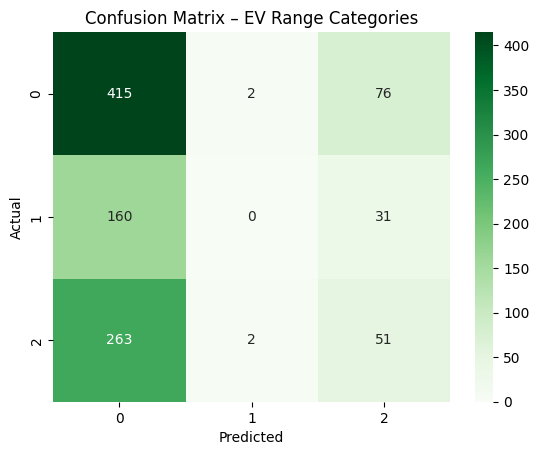

In [3]:
# ============================================================
# 🚗 PROJECT 1: WEATHER IMPACT ON EV RANGE SIMULATOR
# ============================================================

# ▶️ 1. Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, classification_report, confusion_matrix
)

# ▶️ 2. Load dataset
df = pd.read_csv("/content/EV_Energy_Consumption_Dataset.csv")  # update path if needed

print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print(df.head())
print(df.info())

# ▶️ 3. Clean column names (optional)
df.columns = df.columns.str.strip().str.replace(" ", "_")
print("\nColumns:", df.columns.tolist())

# ▶️ 4. Missing values & Correlation
print("\nMissing values:\n", df.isnull().sum())

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - Weather & EV Performance")
plt.show()

# ============================================================
# PART A: REGRESSION – Predict EV Range (Distance Travelled)
# ============================================================

# Select relevant features influencing EV range
features = [
    'Temperature_C', 'Humidity_%', 'Wind_Speed_ms', 'Battery_State_%',
    'Battery_Temperature_C', 'Speed_kmh', 'Slope_%',
    'Weather_Condition', 'Traffic_Condition', 'Driving_Mode'
]
target = 'Distance_Travelled_km'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

print("\n--- Regression Results ---")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

importances = pd.Series(rf_reg.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance – Distance (EV Range) Prediction")
plt.xlabel("Importance Score")
plt.show()

# ============================================================
# PART B: CLASSIFICATION – Range Category (Low / Medium / High)
# ============================================================

# Categorize based on distance travelled
bins = [0, 10, 25, np.inf]   # You can adjust thresholds based on your dataset
labels = ['Low', 'Medium', 'High']
df['Range_Category'] = pd.cut(df['Distance_Travelled_km'], bins=bins, labels=labels)

X = df[features]
y = df['Range_Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("\n--- Classification Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – EV Range Categories")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
